In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_ta as ta
import pynance as pn
import yfinance as yf
from datetime import datetime

In [10]:
df = pd.read_csv(r"C://Users//Hiwi//Downloads//Data//yfinance_data//AAPL_historical_data.csv", parse_dates=['Date'], index_col='Date')
print(f"Dataset shape: {df.shape}")
print("\nSample data:")
df.head()

Dataset shape: (10998, 8)

Sample data:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [23]:
df.columns = df.columns.get_level_values(0)

In [24]:
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-12-31'
df = yf.download(ticker, start=start_date, end=end_date)

# Verify data structure
print("Data Columns:", df.columns.tolist())
df.head()

[*********************100%***********************]  1 of 1 completed

Data Columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


In [25]:
# Verify data structure
print("Data Columns:", df.columns.tolist())
print(f"\nData Range: {df.index[0].date()} to {df.index[-1].date()}")

Data Columns: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]

Data Range: 2020-01-02 to 2023-12-29


In [27]:
df.columns = df.columns.get_level_values(0)
df.ta.rsi(length=14, append=True)
print(df[['Close', 'RSI_14']].tail(10))


Price            Close     RSI_14
Date                             
2023-12-15  196.133698  67.991797
2023-12-18  194.465912  62.680189
2023-12-19  195.508286  64.544511
2023-12-20  193.413605  58.247456
2023-12-21  193.264679  57.815579
2023-12-22  192.192551  54.672787
2023-12-26  191.646576  53.090101
2023-12-27  191.745819  53.354431
2023-12-28  192.172699  54.540997
2023-12-29  191.130325  51.121314


In [29]:
# Add Moving Averages
df['SMA_20'] = ta.sma(df['Close'], length=20)
df['EMA_20'] = ta.ema(df['Close'], length=20)
print(df[['Close', 'SMA_20', 'EMA_20']].tail(10))

Price            Close      SMA_20      EMA_20
Date                                          
2023-12-15  196.133698  191.124869  190.797721
2023-12-18  194.465912  191.432616  191.147072
2023-12-19  195.508286  191.705122  191.562426
2023-12-20  193.413605  191.913098  191.738729
2023-12-21  193.264679  192.080373  191.884057
2023-12-22  192.192551  192.260553  191.913438
2023-12-26  191.646576  192.422370  191.888022
2023-12-27  191.745819  192.558871  191.874479
2023-12-28  192.172699  192.767842  191.902881
2023-12-29  191.130325  192.895904  191.829304


In [21]:
macd = ta.macd(df['Close'])
data = pd.concat([df, macd], axis=1)

print(data.tail())

Price            Close        High         Low        Open    Volume   RSI  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL         
Date                                                                         
2023-12-22  192.192551  193.989390  191.567126  193.761051  37122800  None   
2023-12-26  191.646576  192.480466  191.428174  192.202502  28919300  None   
2023-12-27  191.745819  192.093281  189.700797  191.090629  48087700  None   
2023-12-28  192.172699  193.244849  191.765676  192.728625  34049900  None   
2023-12-29  191.130325  192.986726  190.336138  192.490361  42628800  None   

Price      SMA_20 EMA_20  
Ticker                    
Date                      
2023-12-22   None   None  
2023-12-26   None   None  
2023-12-27   None   None  
2023-12-28   None   None  
2023-12-29   None   None  


In [35]:
# Calculate technical indicators
data['SMA_20'] = ta.sma(data['Close'], length=20)
data['EMA_20'] = ta.ema(data['Close'], length=20)
data['RSI_14'] = ta.rsi(data['Close'], length=14)

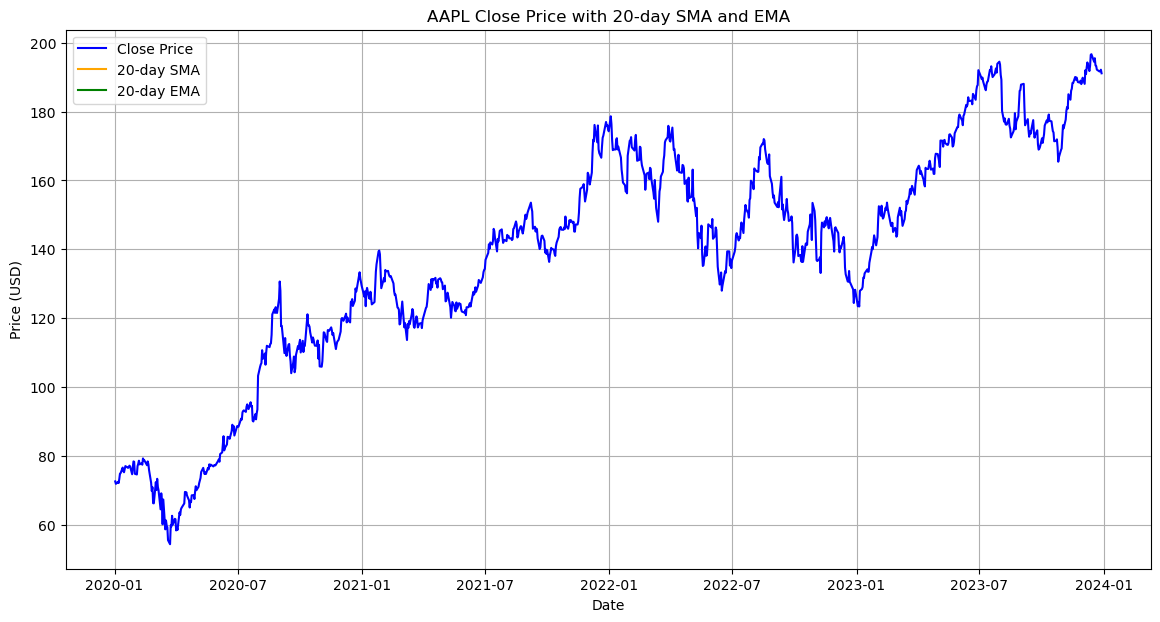

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA_20'], label='20-day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-day EMA', color='green')
plt.title('AAPL Close Price with 20-day SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

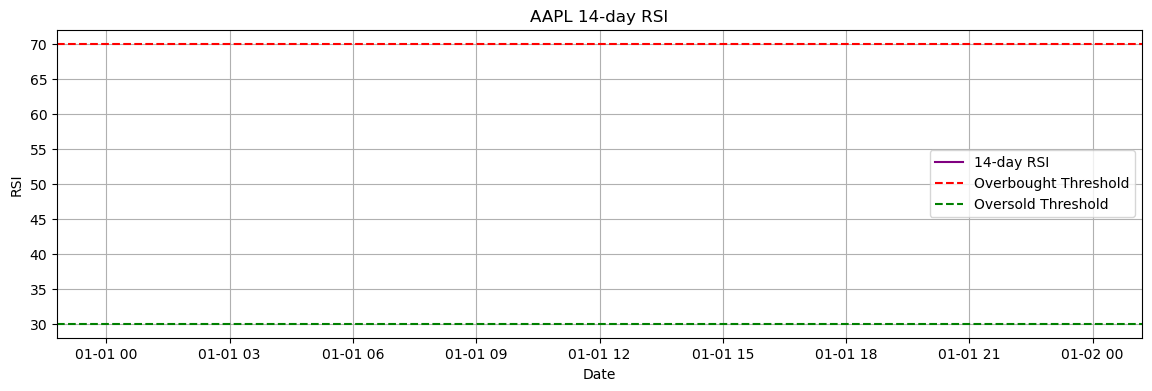

In [37]:
plt.figure(figsize=(14, 4))
plt.plot(data.index, data['RSI_14'], label='14-day RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought Threshold')
plt.axhline(30, color='green', linestyle='--', label='Oversold Threshold')
plt.title('AAPL 14-day RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()